  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Mean Squared Error: 18.964098063541112
R² Score: 0.07514975139436697


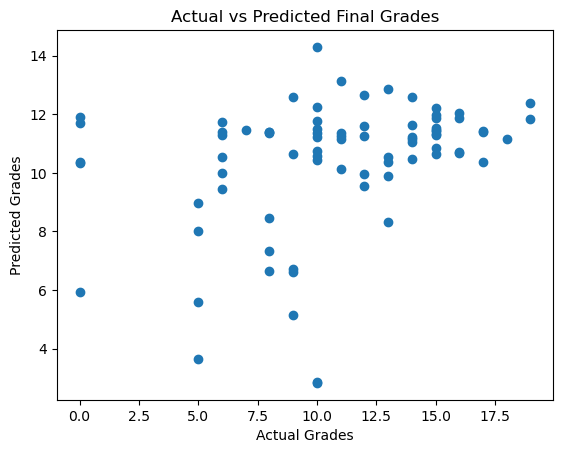

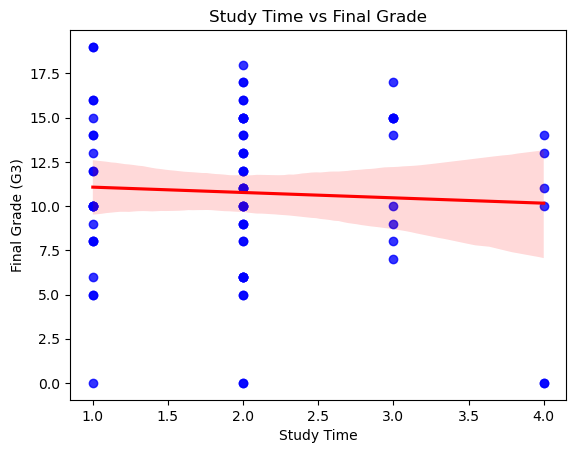

In [2]:
# Import necessary libraries
import pandas as pd
import zipfile
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Download and extract the ZIP file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))

# Step 2: Extract and load the specific CSV file (student-mat.csv)
with z.open('student-mat.csv') as file:
    df = pd.read_csv(file, sep=';')

# Step 3: Preview the data
print(df.head())

# Step 4: Feature selection
# Select features such as attendance, study time, family support, etc.
# Target variable: 'G3' (final grade)
features = ['studytime', 'failures', 'absences', 'famsup', 'schoolsup', 'age', 'health', 'goout']
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})  # Map yes/no to 1/0
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})

X = df[features]  # Feature variables
y = df['G3']      # Target variable: final grade

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Step 9: Visualize Results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Final Grades')
plt.show()

# Step 10: Visualize the relationship between a feature (e.g., studytime) and final grade
sns.regplot(x=X_test['studytime'], y=y_test, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.title('Study Time vs Final Grade')
plt.show()
